In [1]:
import sys
import os
possible_paths = [
        '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data',
        'F:/spectral_clustering_finance/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data'
    ]

path = None
for p in possible_paths:
    if os.path.isdir(p):
        path = p
        print(f"Using data path: {path}")
        break

if path is None:
    print("Error: No valid data path found.")
    sys.exit(1)

Using data path: /Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set


In [2]:
from utils.returns import *
from utils.trader import execute_trading_strategy
from utils.helper import *

In [3]:
eligible_dates_txt_output = path + '/eligible_dates.txt'
eligible_dates = get_eligible_date_paths_from_file(eligible_dates_txt_output)

Successfully read 5269 paths from /Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/eligible_dates.txt


In [4]:
print(f"Eligible dates loaded: {eligible_dates}")

Eligible dates loaded: ['/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000103.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000316.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000331.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000414.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20001218.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010102.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010103.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010104.csv.gz', '/Users/khang/Desktop/ma

In [5]:
import time

start_time = time.time()
daily_PnL = execute_trading_strategy(win_threshold=0.1,
                                     lookback_window=60,
                                     lookforward_window=3,
                                     w=5,
                                     eligible_dates=eligible_dates)
end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

Day 64: PnL = [-0.01 -0.01  0.04]
Day 67: PnL = [ 0.02  0.   -0.01]
Day 70: PnL = [-0.12  0.04 -0.04]
Day 71: PnL = [0.31]
Day 72: PnL = [0.19]
Day 73: PnL = [0.21]
Day 74: PnL = [0.49]
Day 75: PnL = [0.17]
Day 78: PnL = [ 0.06  0.02 -0.02]
Day 81: PnL = [-0.11 -0.07 -0.13]
Day 84: PnL = [-0.12 -0.09 -0.14]
Day 86: PnL = [-0.08  0.22]
Day 89: PnL = [-0.2   0.12  0.25]
Day 92: PnL = [0.08 0.01 0.17]
Day 93: PnL = [0.26]
Day 96: PnL = [-0.15 -0.14 -0.06]
Day 99: PnL = [-0.04  0.07  0.06]
Day 101: PnL = [0.01 0.21]


/opt/miniconda3/envs/math285j_project/lib/python3.13/site-packages/signet/cluster.py:525: UserWarning: Exited at iteration 5 with accuracies 
[1.37e-05 2.15e-05 5.94e-06 1.32e-05 1.91e-03 3.21e-07 1.28e-09 5.01e-10
 1.91e-12 8.60e-13 5.53e-13 1.16e-13 1.00e-13 9.82e-14 9.59e-14 9.42e-14
 1.09e-13 9.90e-14 8.97e-14 9.21e-14 8.46e-14 7.91e-14 8.02e-14 1.20e-13
 1.13e-13 1.17e-13 8.98e-14 7.57e-14 8.33e-14 7.19e-14 7.17e-14 6.96e-14
 6.97e-14 6.43e-14 7.15e-14 8.87e-14 1.29e-13 6.86e-14 1.05e-13 8.81e-14]
not reaching the requested tolerance 3.740191459655762e-05.
Use iteration 5 instead with accuracy 
4.923884427250051e-05.

  (w, v) = ss.linalg.lobpcg(matrix1, v0, B=matrix2, maxiter=mi, largest=False)


Day 104: PnL = [ 0.05 -0.02  0.28]
Day 106: PnL = [0.09 0.21]
Day 109: PnL = [-0.15 -0.08 -0.13]
Day 112: PnL = [ 0.05 -0.04 -0.1 ]
Day 115: PnL = [-0.03 -0.11 -0.51]
Day 116: PnL = [0.47]
Day 118: PnL = [0.07 0.08]
Day 119: PnL = [0.3]
Day 122: PnL = [0.   0.05 0.03]
Day 125: PnL = [-0.25 -0.   -0.22]
Day 128: PnL = [-0.1  -0.14  0.07]
Day 130: PnL = [0.08 0.06]
Day 132: PnL = [-0.09  0.28]
Day 134: PnL = [0.1  0.15]
Day 137: PnL = [-0.04  0.03 -0.01]
Day 138: PnL = [0.28]
Day 141: PnL = [-0.05  0.01 -0.09]
Day 144: PnL = [-0.22 -0.08 -0.14]
Day 146: PnL = [0.05 0.12]
Day 149: PnL = [ 0.01 -0.1  -0.23]
Day 152: PnL = [-0.13 -0.17  0.07]
Day 154: PnL = [-0.18  0.49]
Day 157: PnL = [ 0.1  -0.12 -0.11]
Day 160: PnL = [-0.31  0.16 -0.05]
Day 163: PnL = [-0.37 -0.29 -0.02]
Day 164: PnL = [0.16]
Day 167: PnL = [-0.91 -0.09 -0.36]
Day 169: PnL = [-0.13  0.85]
Day 172: PnL = [-0.12 -0.69 -0.19]
Day 173: PnL = [0.55]
Day 176: PnL = [-0.21  0.16  0.71]
Day 177: PnL = [0.67]
Day 180: PnL = [-0.0

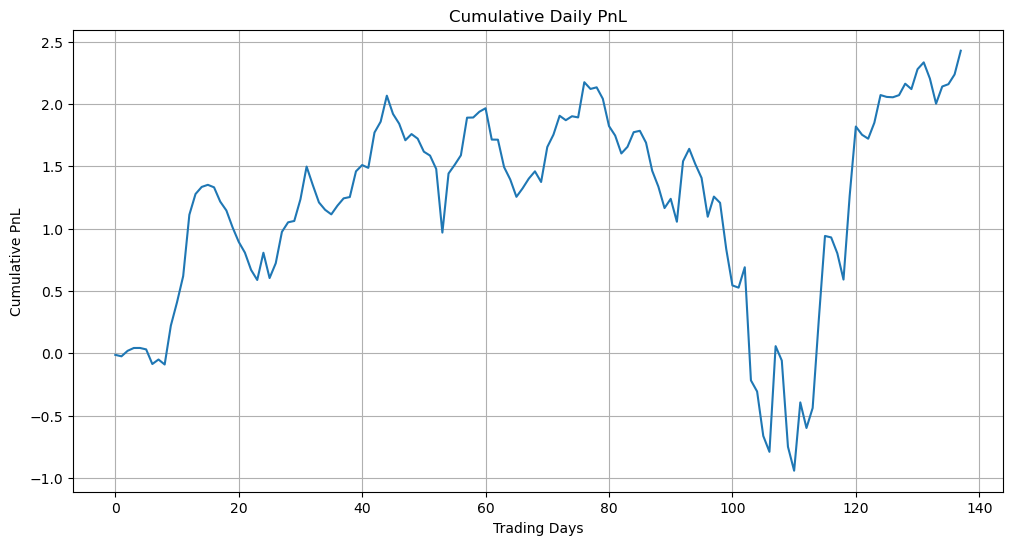

In [6]:
import matplotlib.pyplot as plt
cumulative_pnl = np.cumsum(daily_PnL)

plt.figure(figsize=(12, 6))
plt.plot(cumulative_pnl)
plt.title('Cumulative Daily PnL')
plt.xlabel('Trading Days')
plt.ylabel('Cumulative PnL')
plt.grid(True)
plt.show()

In [8]:
def calculate_Return_Rate(R_curr: pd.DataFrame, window_width: int):
    return 'hello world'

In [9]:
print(calculate_Return_Rate(pd.DataFrame(), 5))  # Example usage, replace with actual DataFrame

hello world
